# Guided Project: Star Wars Survey

The data information is a survey done to find the best "Star Wars" characters. some of the coulmns are as below,

* RespondentID - An anonymized ID for the respondent (person taking the survey)
* Gender - The respondent's gender
* Age - The respondent's age
* Household Income - The respondent's income
* Education - The respondent's education level
* Location (Census Region) - The respondent's location
* Have you seen any of the 6 films in the Star Wars franchise? - Has a Yes or No response
* Do you consider yourself to be a fan of the Star Wars film franchise? - Has a Yes or No response 

For some of the questions regarding the star wars charactors a survey was done for the star wars fans using the online tool SurveyMonkey and received 835 total responses which can be downloaded [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [1]:
#import libraries
import pandas as pd

In [2]:
#read the data
star_wars = pd.read_csv("star_wars.csv", encoding ="ISO-8859-1" )

In [3]:
#explore the data
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
#Explore the column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
star_wars.shape

(1187, 38)

In [6]:
star_wars.isnull().sum()

RespondentID                                                                                                                                       1
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

We can see there is a 1 null value for RespondentID. RespondentID is suppose to be a unique ID for each respondent. We will remove that row.

In [7]:
# Removing the null values in RespondentID column
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

In [8]:
star_wars.shape

(1186, 38)

### Convert the columns to boolean

For the two columns 'Have you seen any of the 6 films in the Star Wars franchise?' and 'Do you consider yourself to be a fan of the Star Wars film franchise?' both represents Yes/No questions. We will change convert the answers to have True, False or NaN.

In [9]:
yes_no = {"Yes": True, "No": False}
for col in [
    "Have you seen any of the 6 films in the Star Wars franchise?",
    "Do you consider yourself to be a fan of the Star Wars film franchise?"
    ]:
    star_wars[col] = star_wars[col].map(yes_no)

In [10]:
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [11]:
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

For the next 6 column questions are as below:

* Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
* Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

We will change these column input as if they have given the name True and if its not filled in with a movie then as False

In [12]:
#columns 3 to 9 changed the user input movie names as True and if they havvent filled in with a movie name as False
import numpy as np
True_False ={np.nan : False, "Star Wars: Episode I  The Phantom Menace": True, "Star Wars: Episode II  Attack of the Clones":True,
            "Star Wars: Episode III  Revenge of the Sith":True,"Star Wars: Episode IV  A New Hope":True,
            "Star Wars: Episode V The Empire Strikes Back":True,"Star Wars: Episode VI Return of the Jedi": True}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(True_False)

### Clean the column names

For the next six columns ask the respondent to rank the Star Wars movies in order of least favourite to most favourite. 1 means the film was the most favourite and 6 mean the least favourite. The columns are as below.

* Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film. - How much the respondent liked Star Wars: Episode I The Phantom Menace
* Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones
* Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith
* Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope
* Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi

We will change the columns to numeric and rename the columns.

In [13]:
#rename the columns as below
star_wars = star_wars.rename(columns = {"Which of the following Star Wars films have you seen? Please select all that apply." : "seen_1",
                            "Unnamed: 4": "seen_2",
                            "Unnamed: 5":"seen_3",
                            "Unnamed: 6":"seen_4",
                            "Unnamed: 7":"seen_5",
                            "Unnamed: 8":"seen_6"})

In [14]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [15]:
star_wars = star_wars.rename(columns = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.":"ranking_1",
                           "Unnamed: 10": "ranking_2",
                           "Unnamed: 11": "ranking_3",
                           "Unnamed: 12": "ranking_4",
                           "Unnamed: 13": "ranking_5",
                           "Unnamed: 14": "ranking_6"})

### Find the highest ranked movie

To find the highest ranked movie we will get the mean value of the columns.

In [16]:
mean_value = star_wars[star_wars.columns[9:15]].mean()
mean_value

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

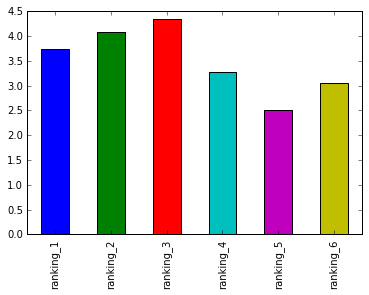

In [17]:
%matplotlib inline
mean_value.plot.bar()

* ranking_3 has the highest mean value and the lowest is from ranking_5. Therefore with the lowest value from ranking_5 column is the popular one.

### Most viewed movie

In [18]:
seen_sum = star_wars[star_wars.columns[3:9]].sum()
seen_sum

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

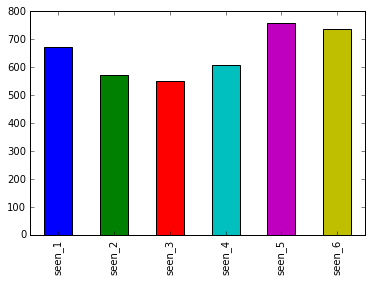

In [19]:
seen_sum.plot.bar()

* The highest seen counts are from seen_5 and the lowest is from seen_3

### Spilt the data frame by gender for anlysis

We will split the column by the gender for further analysis by the rank.

In [20]:
#select the data set for male from gender column
males = star_wars[star_wars["Gender"] == "Male"]

#select the data set for female from gender column
females = star_wars[star_wars["Gender"] == "Female"]

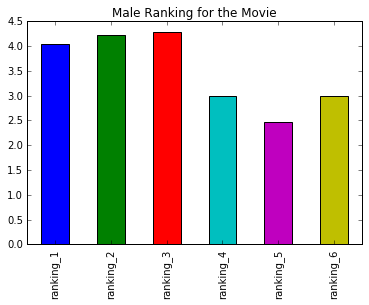

In [21]:
#calculate the mean value for rank in the male data set
male_rank = males[males.columns[9:15]].mean()
male_rank.plot.bar(title = "Male Ranking for the Movie")

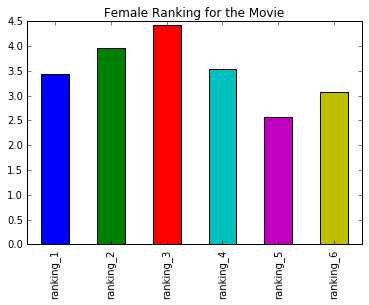

In [22]:
#calculate the mean value for rank in the female data set
female_rank = females[females.columns[9:15]].mean()
female_rank.plot.bar(title = "Female Ranking for the Movie")

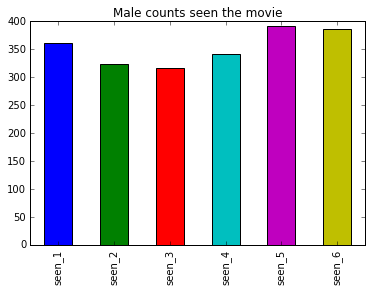

In [23]:
#calculate the sum value for rank in the male data set
male_sum = males[males.columns[3:9]].sum()
male_sum.plot.bar(title ="Male counts seen the movie")

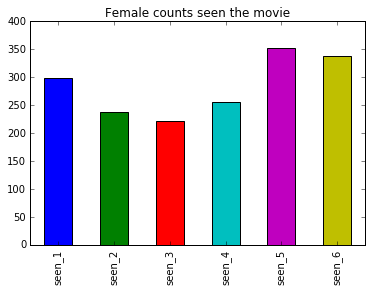

In [24]:
#calculate the sum value for rank in the female data set
female_sum = females[females.columns[3:9]].sum()
female_sum.plot.bar(title ="Female counts seen the movie")

### Conclusion

From the analysis for gender ranking and watching the movies we can conclude that more males have watched the first 3 episodes compared to females and that both males and females ranking for the first 3 episodes are higher.

Overall episode 3 is the highest ranking movie and episode 5 is the most watched movie.